In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [7]:
# reading the file

car = pd.read_csv('quikr_car.csv')
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [8]:
car.shape

(892, 6)

In [9]:
#basic info of dataset
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [10]:
car.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [11]:
# kms_driven and fuel_type has null values

In [12]:
car['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [13]:
# year has many non numberic values
# also need to convert year object to int

In [14]:
car['Price'].unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [15]:
# PRICE has ask for Price
# also convert price to int

In [16]:
car['kms_driven'].unique()

array(['45,000 kms', '40 kms', '22,000 kms', '28,000 kms', '36,000 kms',
       '59,000 kms', '41,000 kms', '25,000 kms', '24,530 kms',
       '60,000 kms', '30,000 kms', '32,000 kms', '48,660 kms',
       '4,000 kms', '16,934 kms', '43,000 kms', '35,550 kms',
       '39,522 kms', '39,000 kms', '55,000 kms', '72,000 kms',
       '15,975 kms', '70,000 kms', '23,452 kms', '35,522 kms',
       '48,508 kms', '15,487 kms', '82,000 kms', '20,000 kms',
       '68,000 kms', '38,000 kms', '27,000 kms', '33,000 kms',
       '46,000 kms', '16,000 kms', '47,000 kms', '35,000 kms',
       '30,874 kms', '15,000 kms', '29,685 kms', '1,30,000 kms',
       '19,000 kms', nan, '54,000 kms', '13,000 kms', '38,200 kms',
       '50,000 kms', '13,500 kms', '3,600 kms', '45,863 kms',
       '60,500 kms', '12,500 kms', '18,000 kms', '13,349 kms',
       '29,000 kms', '44,000 kms', '42,000 kms', '14,000 kms',
       '49,000 kms', '36,200 kms', '51,000 kms', '1,04,000 kms',
       '33,333 kms', '33,600 kms', '5,

In [17]:
# kms_driven has kms with integers
# convert kms_driven object to int

In [18]:
# keep first 3 words of name

# Cleaning

In [19]:
# creating backup file
backup = car.copy()

#### year

In [20]:
# keeping years which are in numeric format
car = car[car['year'].str.isnumeric()]

In [21]:
# converting to int
car['year'] = car['year'].astype(int)

In [22]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int32 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int32(1), object(5)
memory usage: 42.8+ KB


#### Price

In [23]:
# removing 'Ask For Price' from Price column
car = car[car['Price']!='Ask For Price']

In [24]:
# replacing ',' with '' and converting Price column to 
car['Price'] = car['Price'].str.replace(',','').astype(int)

#### kms_driven

In [25]:
car['kms_driven'].str.split(' ').str[0].str.replace(',', '')

0       45000
1          40
3       28000
4       36000
6       41000
        ...  
886    132000
888     27000
889     40000
890    Petrol
891    Petrol
Name: kms_driven, Length: 819, dtype: object

In [26]:
# cleaning up kms_driven column 
# removed ',' , kms and non-numeric noice 
car['kms_driven'] = car['kms_driven'].str.split(' ').str[0].str.replace(',', '')


In [27]:
car = car[car['kms_driven'].str.isnumeric()]

In [28]:
# converting kms_driven to int
car['kms_driven'] = car['kms_driven'].astype(int)

In [29]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [30]:
# dropping null values
car.dropna(inplace = True)

In [31]:
# since name of the cars is not consistent and we want name as categorical variables
# so we are going to keep only first 3 words of names for the cars
car['name'] = car['name'].str.split(' ').str[:3].str.join(' ')

In [32]:
car = car.reset_index(drop = True)
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.8+ KB


In [33]:
car.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [34]:
# from the above table we can say that in Price and kms_driven we have outliers 


<Axes: >

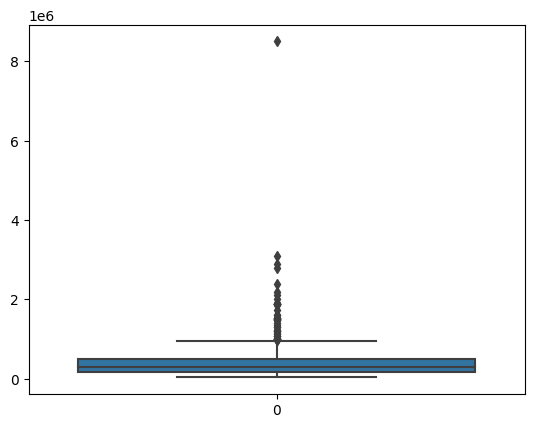

In [35]:
# dealing with outliers 
sns.boxplot(car['Price'])

In [36]:
# in price column we have extreme outlier 
# removing Prices greater than 5 lakhs
car = car[car['Price'] < 5000000]

In [37]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


<Axes: >

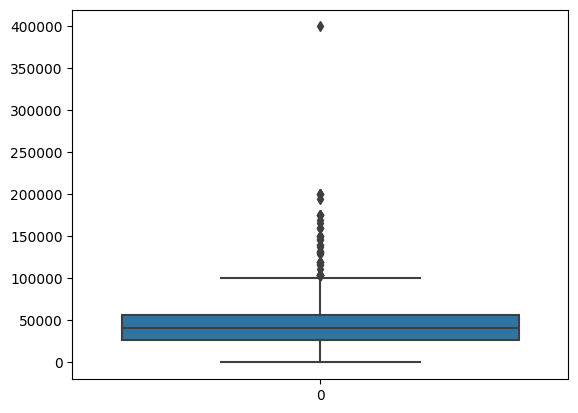

In [38]:
sns.boxplot(car['kms_driven'])

In [39]:
car = car[car['kms_driven'] < 350000]

In [40]:
# saving cleaned data into Cleaned_car.csv
car.to_csv('cleaned_car.csv')

# Model

In [41]:
X = car.drop('Price', axis = 1)
y = car['Price']

In [150]:
# Finding the model with a random state of TrainTestSplit 
# where the model was found to give almost 0.84 as r2_score

scores = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = i)
    lr = RandomForestRegressor()
    pipe = make_pipeline(column_transform, lr)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    scores.append(r2_score(y_test, y_pred))
    
print(np.argmax(scores))
print(scores[np.argmax(scores)])

# The best model is found at a certain random state
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=np.argmax(scores))
# lr=LinearRegression()
# pipe=make_pipeline(column_transform,lr)
# pipe.fit(X_train,y_train)
# y_pred=pipe.predict(X_test)
# r2_score(y_test,y_pred)

10
0.8921164362731628


In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 433)
# random_state = used to control the random shuffling and splitting of the data

In [135]:
ohe = OneHotEncoder()
ohe.fit(X[['name', 'company', 'fuel_type']])

OneHotEncoder()

In [136]:
ohe.categories_

[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
        'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
        'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
        'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
        'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
        'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
        'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
        'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
        'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
        'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
        'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
        'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
        'Ford EcoSport Titanium', 'Ford EcoSport Trend',
        'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
        '

In [137]:
column_transform = make_column_transformer((OneHotEncoder(categories = ohe.categories_),
                                            ['name','company','fuel_type']),
                                            remainder='passthrough')

In [145]:
def model(column_transform, model_name,X_train, y_train, X_test):
    regressor = model_name
    pipe = make_pipeline(column_transform, regressor)
    pipe.fit(X_train, y_train)
    y_train_pred = pipe.predict(X_train)
    y_test_pred = pipe.predict(X_test)
    print('Training data')
    print('r2_score: ',r2_score(y_train, y_train_pred),' | RMSE: ', np.sqrt(mean_squared_error(y_train, y_train_pred)) )
    print('Test data')
    print('r2_score: ',r2_score(y_test, y_test_pred),' | RMSE: ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

### LinearRegression

In [146]:
model(column_transform, LinearRegression(), X_train, y_train, X_test)

Training data
r2_score:  0.8082681387190405  | RMSE:  167533.1264172558
Test data
r2_score:  0.8439025406467207  | RMSE:  148855.2847352427


### KNeighborsRegressor

In [147]:
model(column_transform, KNeighborsRegressor(), X_train, y_train, X_test)

Training data
r2_score:  0.42216265265987574  | RMSE:  290841.48476340086
Test data
r2_score:  0.3354343549587949  | RMSE:  307139.22479025734


### DecisionTreeRegressor

In [148]:
model(column_transform, DecisionTreeRegressor(), X_train, y_train, X_test)

Training data
r2_score:  0.9999370172801614  | RMSE:  3036.436858801948
Test data
r2_score:  0.7676567615050407  | RMSE:  181606.48794133475


### RandomForestRegressor

In [149]:
model(column_transform, RandomForestRegressor(), X_train, y_train, X_test)

Training data
r2_score:  0.939586343776596  | RMSE:  94041.83808062327
Test data
r2_score:  0.8738622141584795  | RMSE:  133810.1144631536


### XGBRegressor

In [143]:
model(column_transform, xgboost.XGBRegressor(), X_train, y_train, X_test)

Training data
r2_score:  0.9759413454887705  | RMSE:  61344.19640169301
Test data
r2_score:  0.7450333344733319  | RMSE:  160678.36053224764


## make predictions

In [55]:
pipe.predict(pd.DataFrame(
    columns = X_test.columns,
    data = np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([427530.35094259])

In [151]:
pickle.dump(pipe,open('RandomForestRegressor.pkl','wb'))

In [46]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],
                          data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))


array([445439.29535056])